In [82]:
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
%matplotlib inline
import os
import random
import json
import matplotlib.pyplot as plt
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [2]:
full_df = pd.read_csv('project_curator.csv', index_col=0)

In [3]:
full_df.head()

,format,identifier,language,publisher,date,description,creator,coverage,type,title,subject,contributor,relation,tag
0,"["" 'hoogte 97 CMcmcm'"", "" 'breedte 81 CMcmcm'""...","['SK-A-4878', 'RM0001.COLLECT.2']",Dutch,Rijksmuseum,1644 - 1648,Een jonge vrouw haar handen warmend boven gloe...,"schilder: Everdingen, Caesar Boëtius van","['Nederland', 'tweede kwart 17e eeuw']",schilderij,Een jonge vrouw haar handen warmend boven een ...,"['Iconclasscode: 41B211', 'Iconclasscode: 23D41']","Aankoop met steun van de Vereniging Rembrandt,...",0.0,0000001_SK-A-4878
1,"["" 'drager: hoogte 40 CMcmcm'"", "" 'drager: bre...","['SK-A-4877', 'RM0001.COLLECT.5']",Dutch,Rijksmuseum,1857 - 1857,Portret van Jacob Maris op twintigjarige leeft...,"schilder: Maris, Matthijs","[None, 'derde kwart 19e eeuw']",schilderij,Portret van Jacob Maris,"Maris, Jacob",0.0,0.0,0000002_SK-A-4877
2,"["" 'drager: hoogte 71.5 CMcmcm'"", "" 'drager: b...","['SK-A-4881', 'RM0001.COLLECT.9']",Dutch,Rijksmuseum,1675 - 1685,Portret van een jonge man uit de familie Van A...,"schilder: Maes, Nicolaes","[None, 'vierde kwart 17e eeuw']",schilderij,"Portret van een jonge man, waarschijnlijk Simo...","['Alphen, Simon van', 'Iconclasscode: 61B2', '...",0.0,0.0,0000003_SK-A-4881
3,"["" 'plaatrand: hoogte 156 MMmmmm'"", "" 'plaatra...","['RP-P-1992-35', 'RM0001.COLLECT.21']",Dutch,Rijksmuseum,"['1555 - 1555', '1556 - 1556']","Keizer Karel V zit op een troon, met een adela...","['vermeld op object prentmaker: Coornhert, Dir...","['Haarlem', 'Haarlem', 'Antwerpen']","['prent', 'historieprent']",['Keizer Karel V omgeven door zijn overwonnen ...,['Karel V van Habsburg (Duits keizer en koning...,Aankoop uit het F.G. Waller-Fonds,0.0,0000004_RP-P-1992-35
4,"["" 'plaatrand: hoogte 158 MMmmmm'"", "" 'plaatra...","['RP-P-1992-36', 'RM0001.COLLECT.36']",Dutch,Rijksmuseum,1555 - 1556,"De gevangenname van Frans I, koning van Frankr...","['mogelijk prentmaker: Coornhert, Dirck Volcke...","['Haarlem', 'Antwerpen', 'Haarlem', 'Antwerpen']","['prent', 'historieprent']",['Gevangename van Frans I tijdens de slag van ...,['Frans I van Valois-Angoulême (koning van Fra...,Aankoop uit het F.G. Waller-Fonds,NaN,0000005_RP-P-1992-36


In [4]:
full_df['creator'].values

array(['schilder: Everdingen, Caesar Boëtius van',
       'schilder: Maris, Matthijs', 'schilder: Maes, Nicolaes', ...,
       ': anoniem',
       "['zwaardveger: Coenraads, Jacobus (Senior)', 'zwaardveger: Coenraads, Jacobus (Junior)']",
       ': George'], dtype=object)

In [5]:
full_df['tag'] = full_df['tag'] + '.jpg'
full_df.head()

,format,identifier,language,publisher,date,description,creator,coverage,type,title,subject,contributor,relation,tag
0,"["" 'hoogte 97 CMcmcm'"", "" 'breedte 81 CMcmcm'""...","['SK-A-4878', 'RM0001.COLLECT.2']",Dutch,Rijksmuseum,1644 - 1648,Een jonge vrouw haar handen warmend boven gloe...,"schilder: Everdingen, Caesar Boëtius van","['Nederland', 'tweede kwart 17e eeuw']",schilderij,Een jonge vrouw haar handen warmend boven een ...,"['Iconclasscode: 41B211', 'Iconclasscode: 23D41']","Aankoop met steun van de Vereniging Rembrandt,...",0.0,0000001_SK-A-4878.jpg
1,"["" 'drager: hoogte 40 CMcmcm'"", "" 'drager: bre...","['SK-A-4877', 'RM0001.COLLECT.5']",Dutch,Rijksmuseum,1857 - 1857,Portret van Jacob Maris op twintigjarige leeft...,"schilder: Maris, Matthijs","[None, 'derde kwart 19e eeuw']",schilderij,Portret van Jacob Maris,"Maris, Jacob",0.0,0.0,0000002_SK-A-4877.jpg
2,"["" 'drager: hoogte 71.5 CMcmcm'"", "" 'drager: b...","['SK-A-4881', 'RM0001.COLLECT.9']",Dutch,Rijksmuseum,1675 - 1685,Portret van een jonge man uit de familie Van A...,"schilder: Maes, Nicolaes","[None, 'vierde kwart 17e eeuw']",schilderij,"Portret van een jonge man, waarschijnlijk Simo...","['Alphen, Simon van', 'Iconclasscode: 61B2', '...",0.0,0.0,0000003_SK-A-4881.jpg
3,"["" 'plaatrand: hoogte 156 MMmmmm'"", "" 'plaatra...","['RP-P-1992-35', 'RM0001.COLLECT.21']",Dutch,Rijksmuseum,"['1555 - 1555', '1556 - 1556']","Keizer Karel V zit op een troon, met een adela...","['vermeld op object prentmaker: Coornhert, Dir...","['Haarlem', 'Haarlem', 'Antwerpen']","['prent', 'historieprent']",['Keizer Karel V omgeven door zijn overwonnen ...,['Karel V van Habsburg (Duits keizer en koning...,Aankoop uit het F.G. Waller-Fonds,0.0,0000004_RP-P-1992-35.jpg
4,"["" 'plaatrand: hoogte 158 MMmmmm'"", "" 'plaatra...","['RP-P-1992-36', 'RM0001.COLLECT.36']",Dutch,Rijksmuseum,1555 - 1556,"De gevangenname van Frans I, koning van Frankr...","['mogelijk prentmaker: Coornhert, Dirck Volcke...","['Haarlem', 'Antwerpen', 'Haarlem', 'Antwerpen']","['prent', 'historieprent']",['Gevangename van Frans I tijdens de slag van ...,['Frans I van Valois-Angoulême (koning van Fra...,Aankoop uit het F.G. Waller-Fonds,NaN,0000005_RP-P-1992-36.jpg


In [6]:
creator_list = full_df['creator'].values

In [7]:
rembrandt_files_name = []
for index, creator in enumerate(creator_list):
  if 'Rembrandt' in str(creator):
    rembrandt_files_name.append(full_df.loc[index, 'tag'])
rembrandt_files_name[:13]

['0002120_SK-A-4589.jpg',
 '0002277_SK-C-5.jpg',
 '0002278_SK-C-6.jpg',
 '0002279_SK-A-3340.jpg',
 '0002280_SK-A-1935.jpg',
 '0002281_SK-A-3981.jpg',
 '0002282_SK-A-3137.jpg',
 '0002283_SK-C-216.jpg',
 '0002284_SK-A-4674.jpg',
 '0002285_SK-A-4833.jpg',
 '0002286_SK-A-3982.jpg',
 '0002287_SK-A-3138.jpg',
 '0002288_SK-A-3341.jpg']

In [8]:
len(rembrandt_files_name)

1947

In [9]:
os.chdir(r'C:\Users\xingx\Google Drive\Kaggle\Rijksmuseum\jpg')

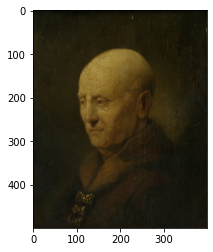

In [10]:
img = image.load_img(rembrandt_files_name[13])
plt.imshow(img)

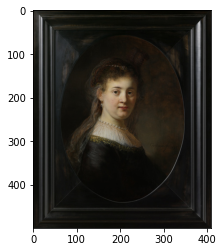

In [11]:
img = image.load_img(rembrandt_files_name[23])
plt.imshow(img)

In [12]:
vermeer_files_name = []
for index, creator in enumerate(creator_list):
  if 'Vermeer' in str(creator):
    vermeer_files_name.append(full_df.loc[index, 'tag'])
vermeer_files_name[:13]

['0003184_SK-A-2344.jpg',
 '0003185_SK-A-1595.jpg',
 '0003186_SK-A-2860.jpg',
 '0003187_SK-C-251.jpg',
 '0004054_SK-A-2351.jpg',
 '0004909_SK-A-248.jpg',
 '0036090_RP-P-1882-A-6717.jpg',
 '0036091_RP-P-1882-A-6718.jpg',
 '0036092_RP-P-1882-A-6778.jpg',
 '0036093_RP-P-1882-A-6779.jpg',
 '0048256_RP-P-1880-A-3914.jpg',
 '0048257_RP-P-1880-A-3917.jpg',
 '0048258_RP-P-1880-A-3916.jpg']

In [13]:
len(vermeer_files_name)

15

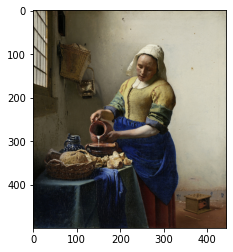

In [14]:
img = image.load_img(vermeer_files_name[0])
plt.imshow(img)

In [15]:
position=[
    [0,0],
    [0,1],
    [0,2],
    [1,0],
    [1,1],
    [1,2],
    [2,0],
    [2,1],
    [2,2],
    [3,0],
    [3,1],
    [3,2],
    [4,0],
    [4,1],
    [4,2],
]

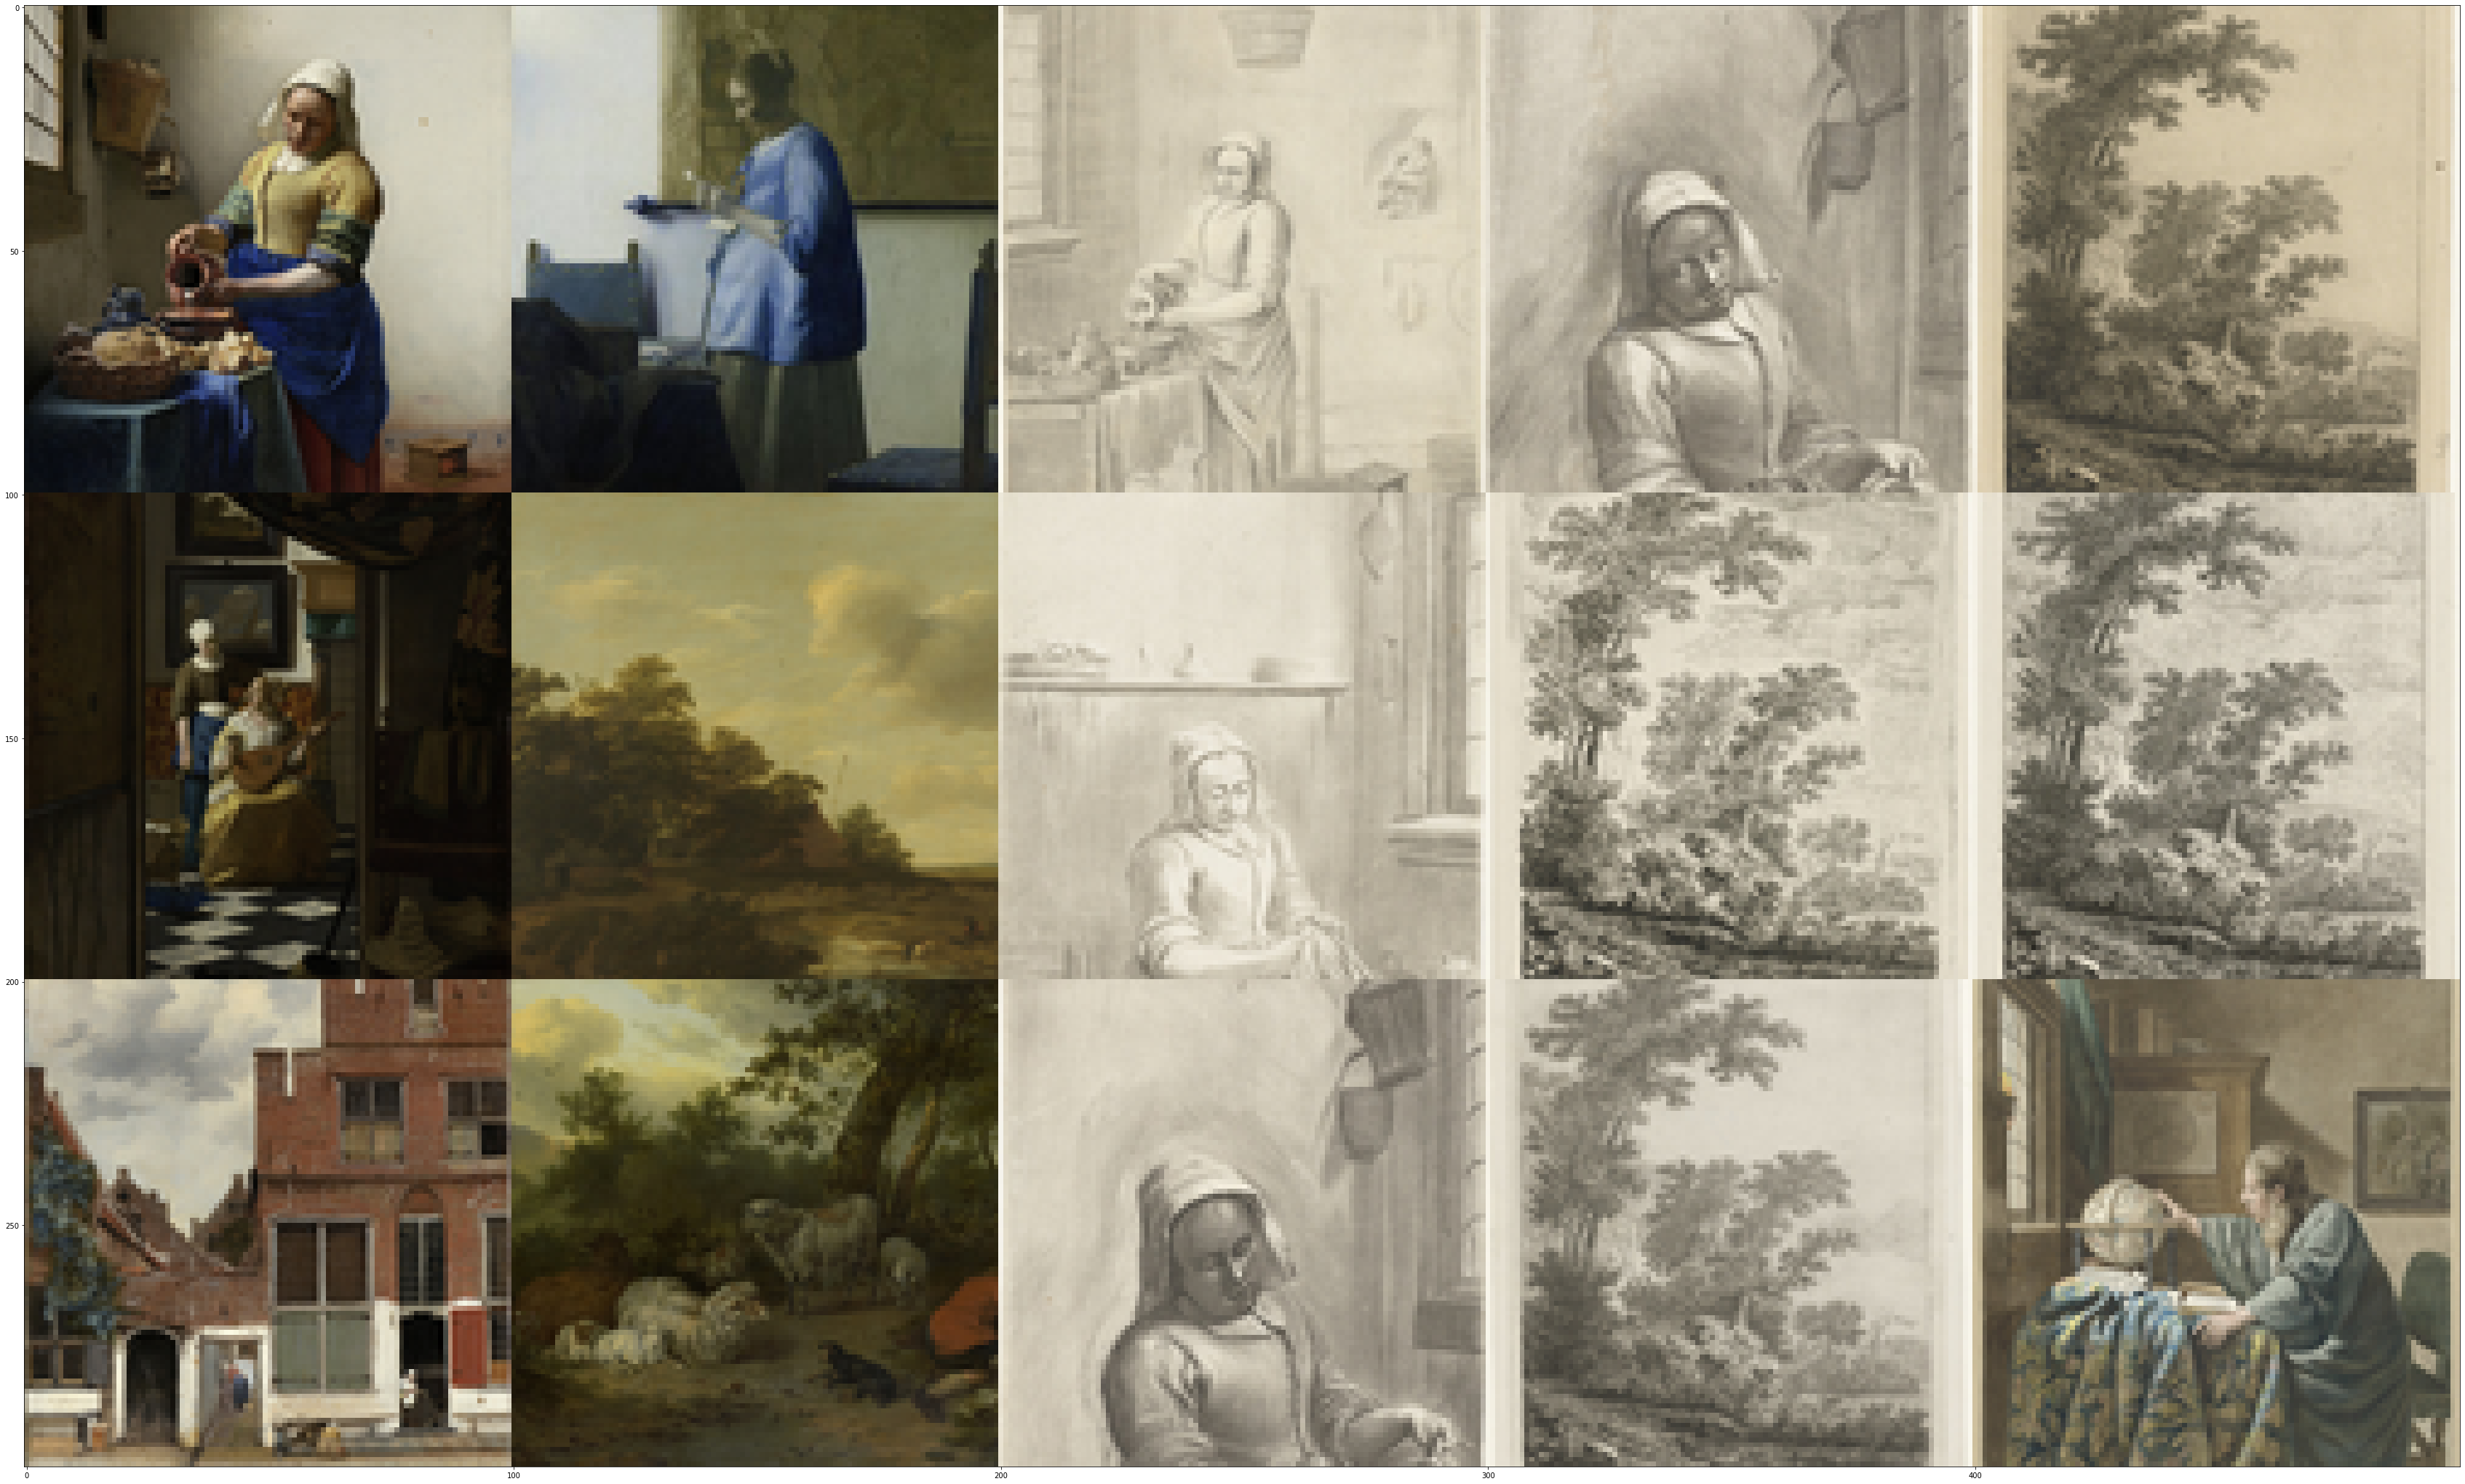

In [103]:
nx = 5
ny = 3
tile_width = 100
tile_height = 100

full_width = tile_width * nx
full_height = tile_height * ny


aspect_ratio = float(tile_width) / tile_height

grid_image = Image.new('RGB', (full_width, full_height))

for img, grid_pos in zip(vermeer_files_name, position):
    idx_x, idx_y = grid_pos
    x, y = tile_width * idx_x, tile_height * idx_y
    tile = Image.open(img)
    tile_ar = float(tile.width) / tile.height  # center-crop the tile to match aspect_ratio
    if (tile_ar > aspect_ratio):
        margin = 0.5 * (tile.width - aspect_ratio * tile.height)
        tile = tile.crop((margin, 0, margin + aspect_ratio * tile.height, tile.height))
    else:
        margin = 0.5 * (tile.height - float(tile.width) / aspect_ratio)
        tile = tile.crop((0, margin, tile.width, margin + float(tile.width) / aspect_ratio))
    tile = tile.resize((tile_width, tile_height), Image.ANTIALIAS)
    grid_image.paste(tile, (int(x), int(y)))

plt.figure(figsize = (60,60))
imshow(grid_image)

In [52]:
# grid_image.save('Vermeer.jpg')

In [18]:
from itertools import permutations  

rem_grid_pos = list(permutations(range(44),2))
rem_grid_pos

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17

In [19]:
for i in range(44):
    rem_grid_pos.append((i, i))

In [20]:
rem_grid_pos.append

<function list.append(object, /)>

In [21]:
rem_grid_pos[-20:]

[(24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 36),
 (37, 37),
 (38, 38),
 (39, 39),
 (40, 40),
 (41, 41),
 (42, 42),
 (43, 43)]

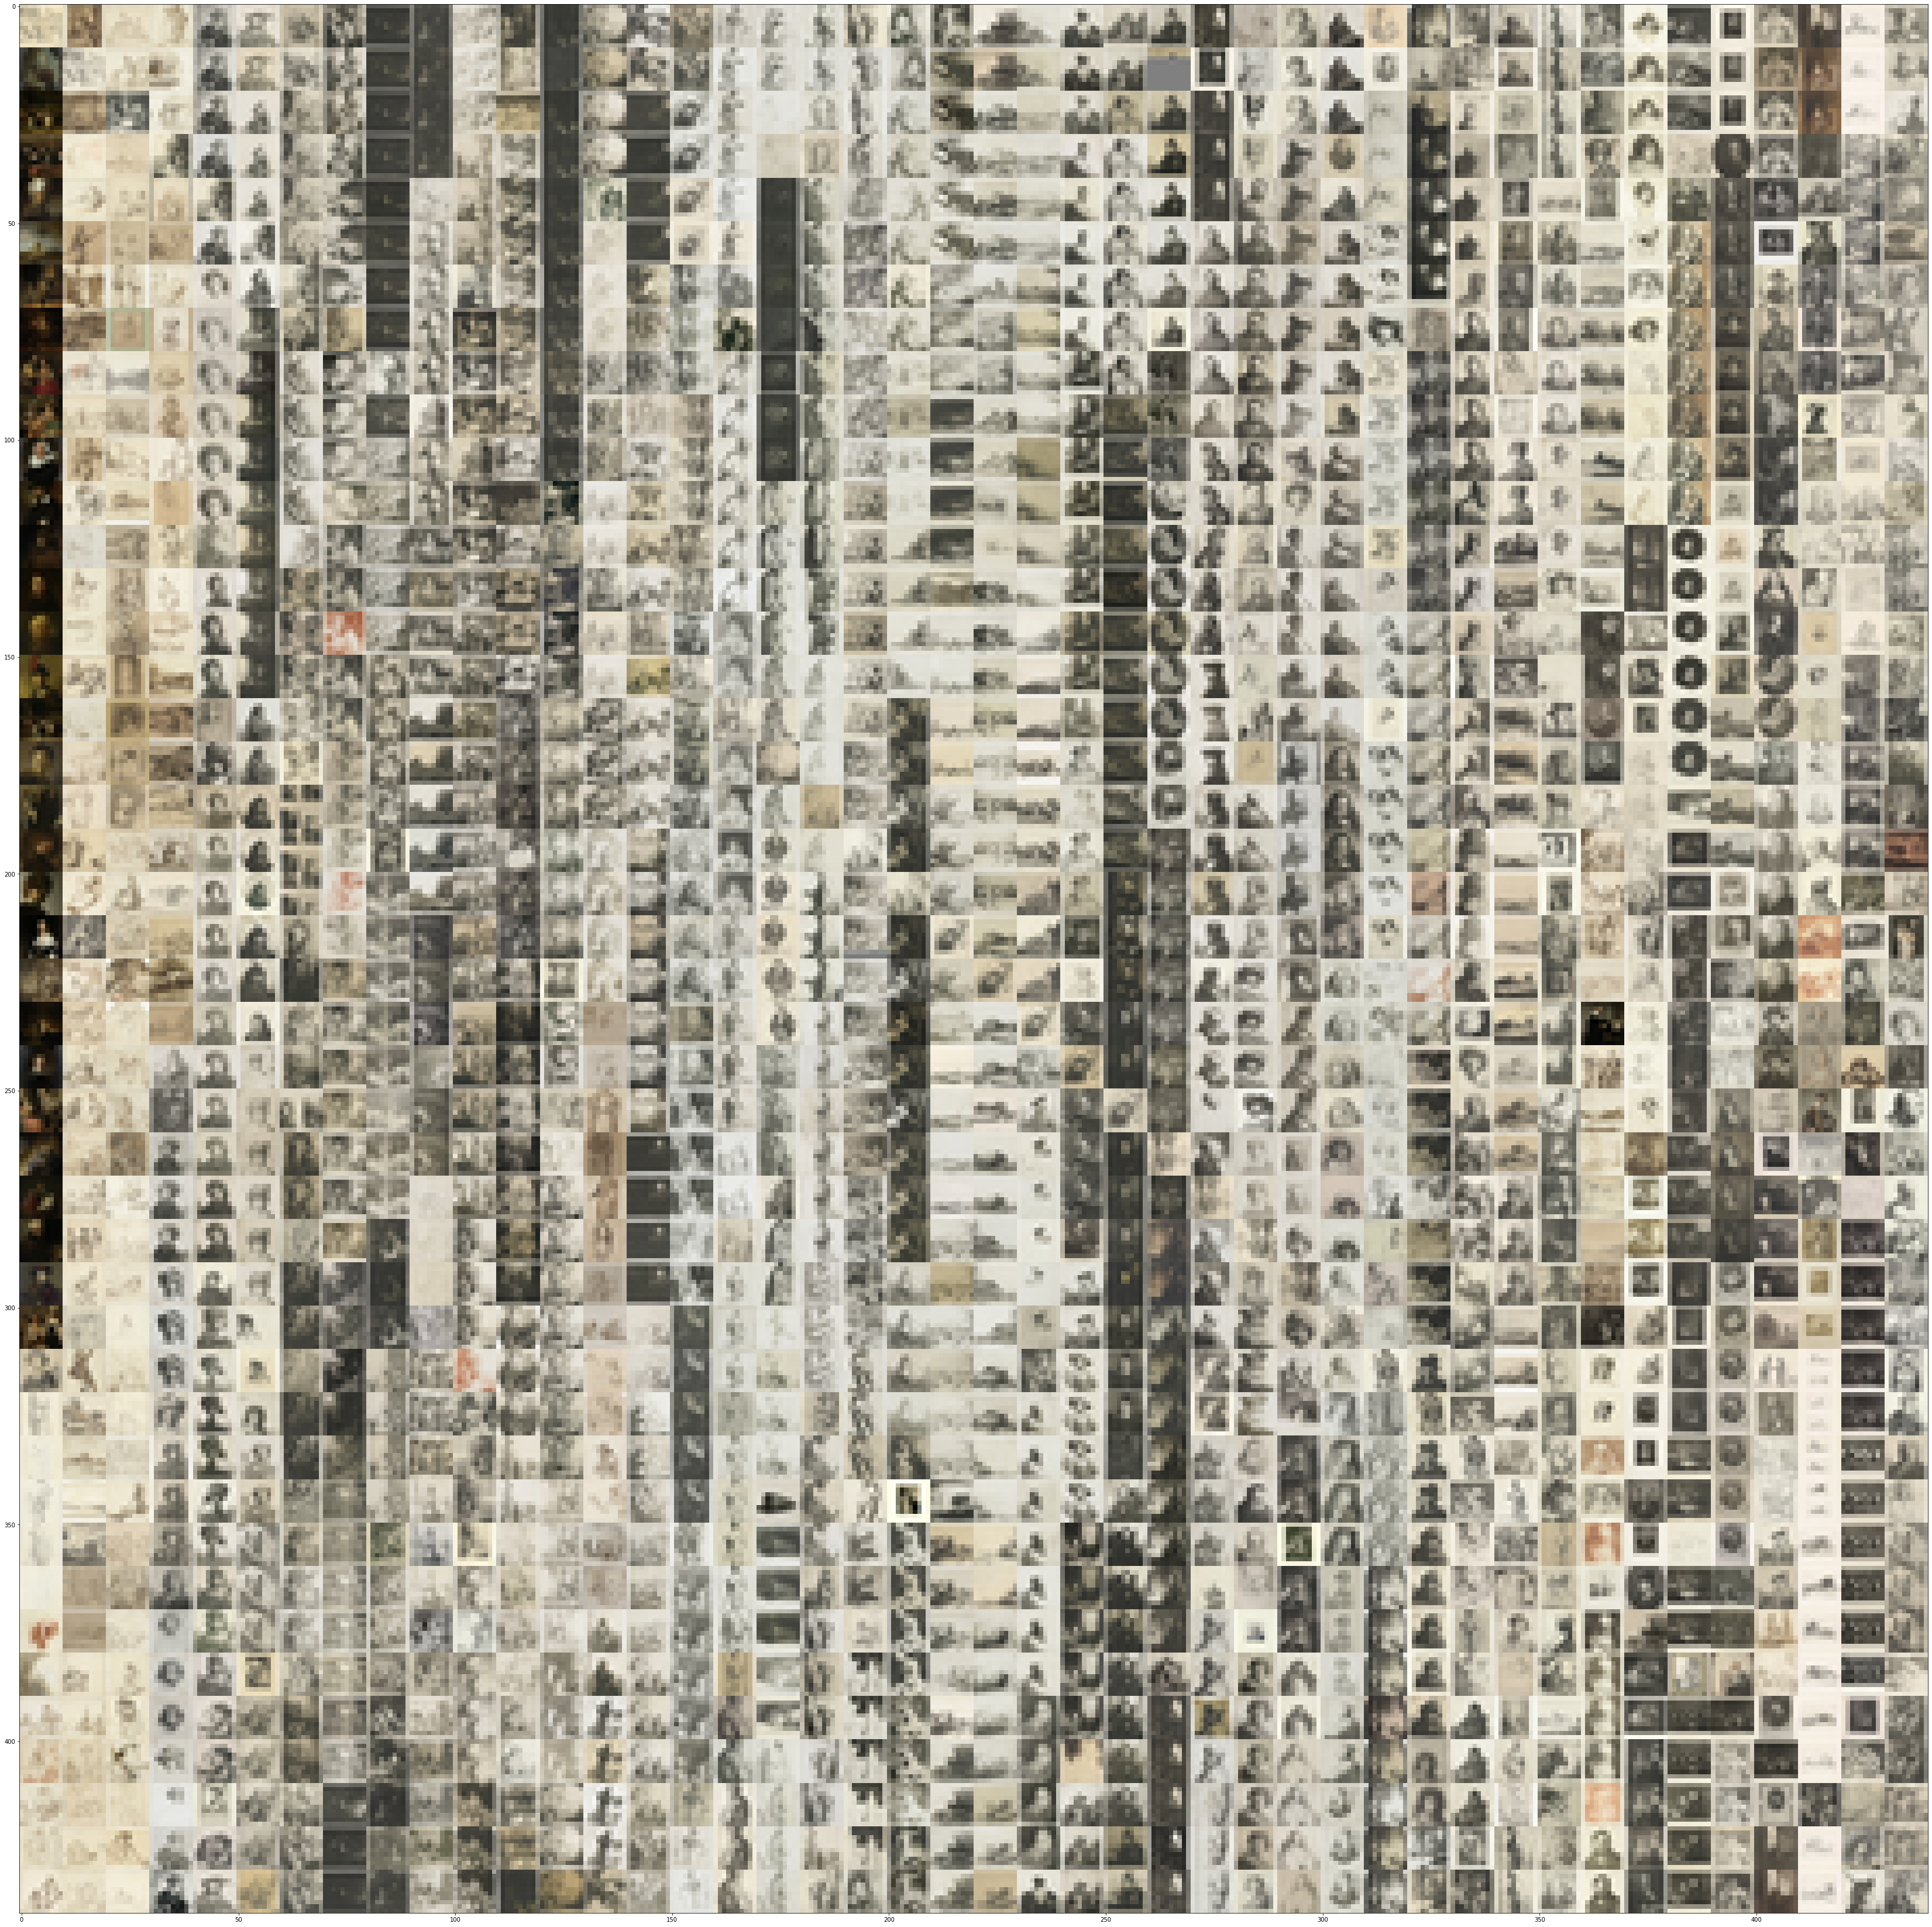

In [104]:
nx = 44
ny = 44
tile_width = 10
tile_height = 10

full_width = tile_width * nx
full_height = tile_height * ny


aspect_ratio = float(tile_width) / tile_height

grid_image = Image.new('RGB', (full_width, full_height))

for img, grid_pos in zip(rembrandt_files_name[:1936], rem_grid_pos):
    idx_x, idx_y = grid_pos
    x, y = tile_width * idx_x, tile_height * idx_y
    tile = Image.open(img)
    tile_ar = float(tile.width) / tile.height  # center-crop the tile to match aspect_ratio
    if (tile_ar > aspect_ratio):
        margin = 0.5 * (tile.width - aspect_ratio * tile.height)
        tile = tile.crop((margin, 0, margin + aspect_ratio * tile.height, tile.height))
    else:
        margin = 0.5 * (tile.height - float(tile.width) / aspect_ratio)
        tile = tile.crop((0, margin, tile.width, margin + float(tile.width) / aspect_ratio))
    tile = tile.resize((tile_width, tile_height), Image.ANTIALIAS)
    grid_image.paste(tile, (int(x), int(y)))

plt.figure(figsize = (60,60))
imshow(grid_image)

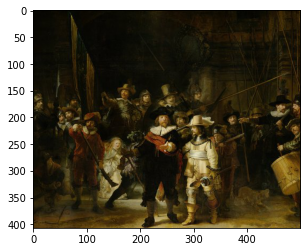

In [33]:
img = image.load_img(rembrandt_files_name[1])
plt.imshow(img)

## 伦勃朗和维米尔的代表作

In [34]:
rembrandt_files_name[1]

'0002277_SK-C-5.jpg'

In [35]:
vermeer_files_name[0]

'0003184_SK-A-2344.jpg'

### Find similar arts between Night Watch and 

In [43]:
images, pca_features, pca = pickle.load(open(r'C:\E-Architecture\Computational Design\Project Curator\full_pca_features.p', 'rb'))

for img, f in list(zip(images, pca_features))[0:5]:
    print("image: %s, features: %0.2f,%0.2f,%0.2f,%0.2f... "%(img, f[0], f[1], f[2], f[3]))

image: C:\Users\xingx\Google Drive\Kaggle\Rijksmuseum\jpg\0000001_SK-A-4878.jpg, features: 12.38,-9.32,20.54,-0.63... 
image: C:\Users\xingx\Google Drive\Kaggle\Rijksmuseum\jpg\0000002_SK-A-4877.jpg, features: 1.96,0.87,22.91,-11.23... 
image: C:\Users\xingx\Google Drive\Kaggle\Rijksmuseum\jpg\0000003_SK-A-4881.jpg, features: -25.52,15.65,6.61,-6.44... 
image: C:\Users\xingx\Google Drive\Kaggle\Rijksmuseum\jpg\0000004_RP-P-1992-35.jpg, features: -9.32,2.02,-5.52,-2.02... 
image: C:\Users\xingx\Google Drive\Kaggle\Rijksmuseum\jpg\0000005_RP-P-1992-36.jpg, features: -8.44,-3.48,-5.08,-9.91... 


In [70]:
#vermeer
for index,image in enumerate(images):
    if '0003184_SK-A-2344.jpg' in image:
        print('yes \t'+str(index))

yes 	2862


In [71]:
index_vermeer = 2862

In [68]:
#rembrandt
for index,image in enumerate(images):
    if '0002277_SK-C-5.jpg' in image:
        print('yes \t'+str(index))

yes 	2055


In [72]:
index_rembrandt = 2055

In [73]:
#similar to vermeer
from scipy.spatial import distance
similar_idx_vermeer = [ distance.cosine(pca_features[index_vermeer], feat) for feat in pca_features ]
idx_closest_vermeer = sorted(range(len(similar_idx_vermeer)), key=lambda k: similar_idx_vermeer[k])

In [77]:
#similar to rembrandt
similar_idx_rembrandt = [ distance.cosine(pca_features[index_rembrandt], feat) for feat in pca_features ]
idx_closest_rembrandt = sorted(range(len(similar_idx_rembrandt)), key=lambda k: similar_idx_rembrandt[k])

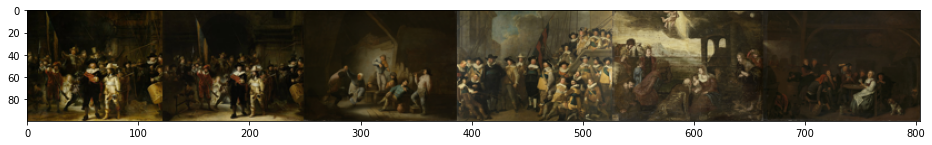

In [91]:
#看看伦勃朗
# load all the similarity results as thumbnails of height 100
thumbs = []
for idx in idx_closest_rembrandt[:6]:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

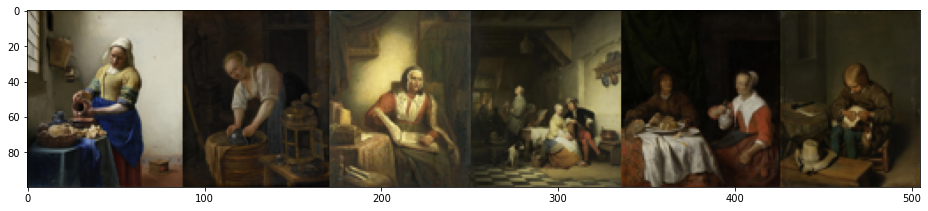

In [92]:
#看看维米尔
# load all the similarity results as thumbnails of height 100
thumbs = []
for idx in idx_closest_vermeer[:6]:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

In [94]:
len(idx_closest_rembrandt)

112039

In [95]:
len(idx_closest_vermeer)

112039

In [96]:
temp1 = idx_closest_rembrandt[:10000]
temp2 = idx_closest_vermeer[:10000]
temp1.extend(temp2)
len(temp1)

20000

In [98]:
len(set(temp1))

16122

In [99]:
demo_ver_rem_file_index = list(set(temp1))